In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV
sns.set_theme()

# Question 1, 2 et 3

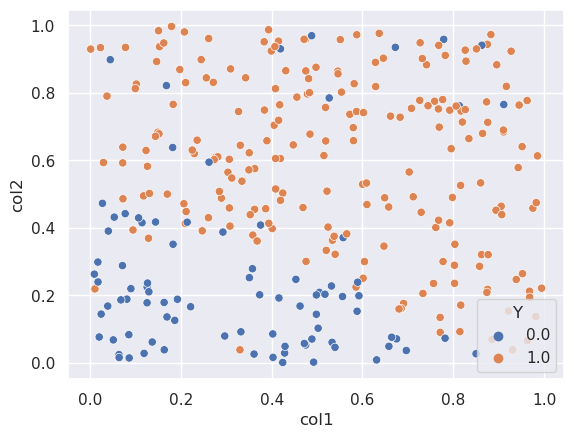

None


In [2]:
def simu0(n, alpha, beta, display=False):
    """Simule et affiche un échantillon de taille n.
    Renvoie les jeux d'entraînement/test avec les étiquettes dissociées.
    """
    if (alpha > 1) or (alpha < 0) or (beta > 1) or (beta < 0):
        raise ValueError('Les paramètres alpha et beta doivent être compris entre 0 et 1.')

    X = np.random.uniform(0, 1, (n, 2))
    Y = np.zeros((n,))
    part1 = X[:, 0] + 2 * X[:, 1] <= 1  # Modification de la condition
    Y[part1] = np.random.uniform(0, 1, len(Y[part1])) <= alpha
    Y[~part1] = np.random.uniform(0, 1, len(Y[~part1])) <= beta
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.5)

    if display:
        df = pd.DataFrame(X)
        df.columns = ['col1', 'col2']
        df['Y'] = Y  # Ajout de Y à la DataFrame
        sns.scatterplot(data=df, x='col1', y='col2', hue='Y')
        plt.show()
        
    #return  X_train, X_test, y_train, y_test

    #return X, Y
        #for i in range(n):
            #X1 = np.random.uniform(0,1)
            #X2 = np.random.uniform(0,1)
            #if np.abs(X1 + 2*X2) <= 1 :
                #Y = 
print(simu0(300, 0.1, 0.9, display=True)) # version avec sns.scatterplot()

In [3]:
def simu(n, alpha, beta, display=False):
    """Simule et affiche un echantillon de taille n.
    Renvoie les jeux d'entrainement/test avec les étiquettes dissociées.
    """
    if (alpha>1) | (alpha<0) | (beta>1) | (beta<0):
        raise ValueError('Les paramètres alpha et beta doivent être compris entre 0 et 1.')
    
    X = np.random.uniform(0, 1, (n,2))
    Y = np.zeros((n,))
    part1 = np.absolute(X[:,0] + 2*X[:,1]) <= 1
    Y[part1] = np.random.binomial(1, alpha, len(Y[part1]))
    Y[~part1] = np.random.binomial(1, beta, len(Y[~part1]))
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.5)
    
    if display == True:
        df = pd.DataFrame(X_train)
        df.columns=['col1', 'col2']
        sns.relplot(data=df,x='col1', y='col2', hue=y_train).set(
            title=f"Simulation pour n={X.shape[0]}", xlabel="X1", ylabel="X2")
    
    return  X_train, X_test, y_train, y_test # version avec sns.relplot()

/users/2024/ds2/121009626/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([[0.53862617, 0.56133121],
       [0.3759091 , 0.9700828 ],
       [0.63295758, 0.11247592],
       [0.51611373, 0.91284602],
       [0.27470976, 0.47640873],
       [0.53050772, 0.92934992],
       [0.66160981, 0.43448857],
       [0.82652375, 0.70487861],
       [0.45140419, 0.43977605],
       [0.48864377, 0.89572135],
       [0.70320814, 0.59102241],
       [0.07552604, 0.76661843],
       [0.06718069, 0.03025586],
       [0.66332489, 0.28007959],
       [0.4766064 , 0.67489388],
       [0.58245567, 0.02004179],
       [0.962156  , 0.36214145],
       [0.25709515, 0.23226321],
       [0.97658498, 0.70607483],
       [0.75201607, 0.13176749],
       [0.93469371, 0.56840827],
       [0.83392651, 0.28833949],
       [0.55713658, 0.32885655],
       [0.50580039, 0.22990268],
       [0.10137335, 0.8517615 ],
       [0.2163904 , 0.75989186],
       [0.86120712, 0.90300969],
       [0.17986926, 0.86798157],
       [0.61440228, 0.71714638],
       [0.32112073, 0.24338797],
       [0

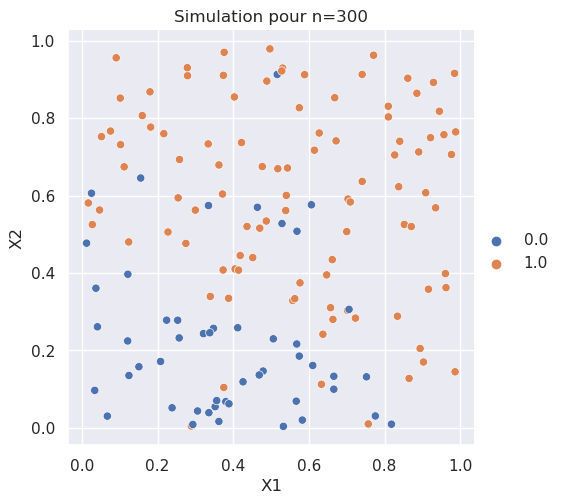

In [4]:
print(simu(300, .1, .9, display=True))

Exercice : programmer "à la main" la fonction train_test_split

In [5]:
def traintestsplitalamain(X,Y,trainsize):
    ## prend en entrée une matrice X de taille n x p
    ## et un vecteur Y de taille n
    ## trainsize désigne la proportion de données attribuées à l'entraînement
    ## renvoie Xtrain, Xtest, Ytrain, Ytest
    n,p=np.shape(X)
    print(n)
    taille_train=int(n*trainsize)
    print(taille_train)
    z=np.random.choice(np.arange(n),n,replace=False)
    print(z)
    indtrain=z[0:taille_train]
    indtest=z[taille_train:n]
    print(len(indtrain))
    print(len(indtest))
    X_trainbis=X[indtrain,]
    X_testbis=X[indtest,]
    Y_trainbis=Y[indtrain]
    Y_testbis=Y[indtest]
    return X_trainbis, X_testbis, Y_trainbis, Y_testbis
    

/users/2024/ds2/121009626/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


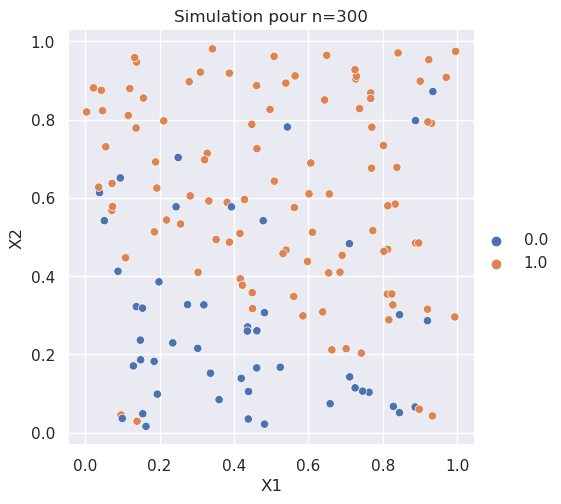

In [6]:
X_train, X_test, y_train, y_test = simu(300, .1, .9, display=True)

# Question 4

Consulter la classe KNeighborsClassifier de sklearn

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

# Ajustement du modèle aux données d'entraînement
knn.fit(X_train, y_train)

# Prédiction des classes des points de test
y_pred = knn.predict([[0.5,0.5],[0.25,0.75]])
print("y_pred =", y_pred)


y_pred = [1. 1.]


# Question 5, 6, 7 et 8

In [8]:
def evaluate(clf, X_train, X_test, y_train, y_test, display=False):
    # Ecrire une fonction qui permet de :
    
    # Pour un prédicteur clf fait : "Fitter les données d'entraînement avec clf.fit"
    clf.fit(X_train, y_train)
    
    # "Prédire l'échantillon test avec clf.predict"
    y_pred = clf.predict(X_test)
    
    # "Calculer le score avec la fonction accuracy_score"
    score = accuracy_score(y_test,y_pred)
    
    
    # "Tracer un graphe avec les bien classés 0 ou 1 et les mal classés, on pourra utiliser sns.scatterplot"
    
    if display:
        # Tracer un graphique avec les bien classés (0 ou 1) et les mal classés
        print(f'Name model: {clf} , Accuracy: {score}')
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        ypredbis=y_pred.copy()
        error = y_test != y_pred
        y_pred[error] = -1
        sns.scatterplot(x= X_test[:,0], y= X_test[:,1], hue=y_pred, palette="deep", ax=axes[0]).set(title =f"simulation", xlabel="X1", ylabel="X2")
        
        
        # Afficher la matrice de confusion
        ConfusionMatrixDisplay.from_predictions(y_test, ypredbis,labels=clf.classes_,ax=axes[1])
        
    return score


    
        


Name model: KNeighborsClassifier(n_neighbors=1) , Accuracy: 0.78


0.78

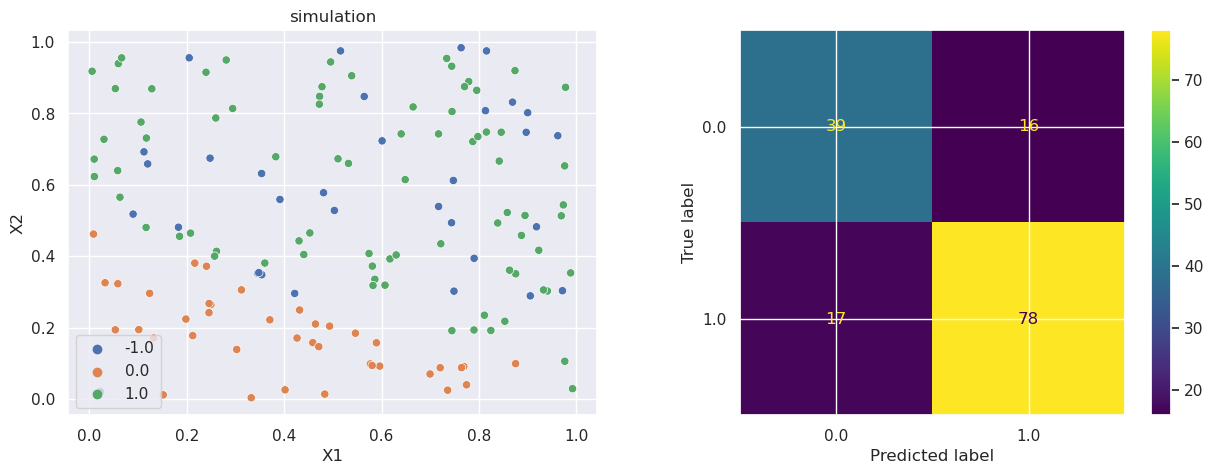

In [9]:
knn1 = KNeighborsClassifier(n_neighbors=1)
evaluate(knn1, X_train, X_test, y_train, y_test, display=True)

Name model: KNeighborsClassifier() , Accuracy: 0.8466666666666667


0.8466666666666667

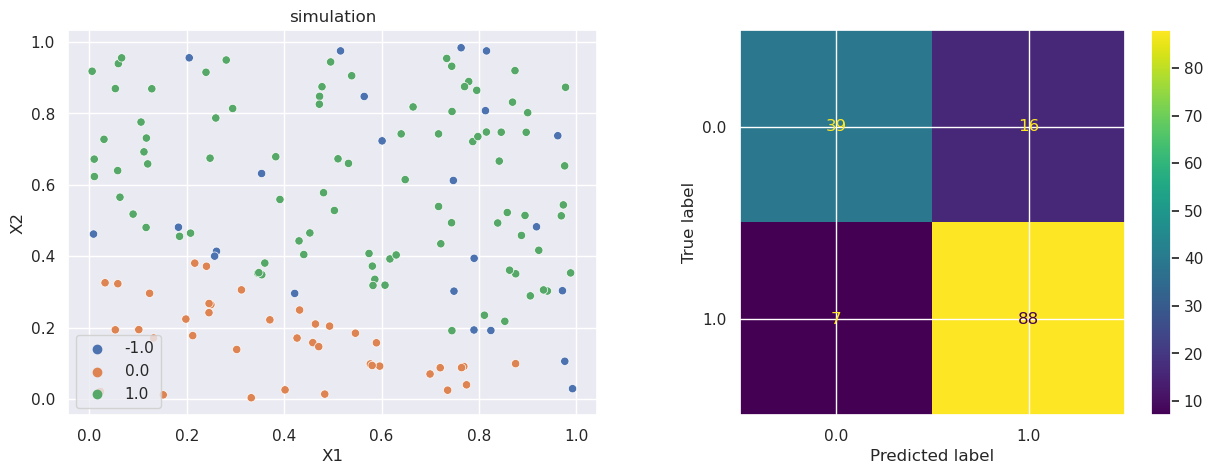

In [10]:
knn5 = KNeighborsClassifier(n_neighbors=5)
evaluate(knn5, X_train, X_test, y_train, y_test, display=True)

Name model: KNeighborsClassifier(n_neighbors=20) , Accuracy: 0.8333333333333334


0.8333333333333334

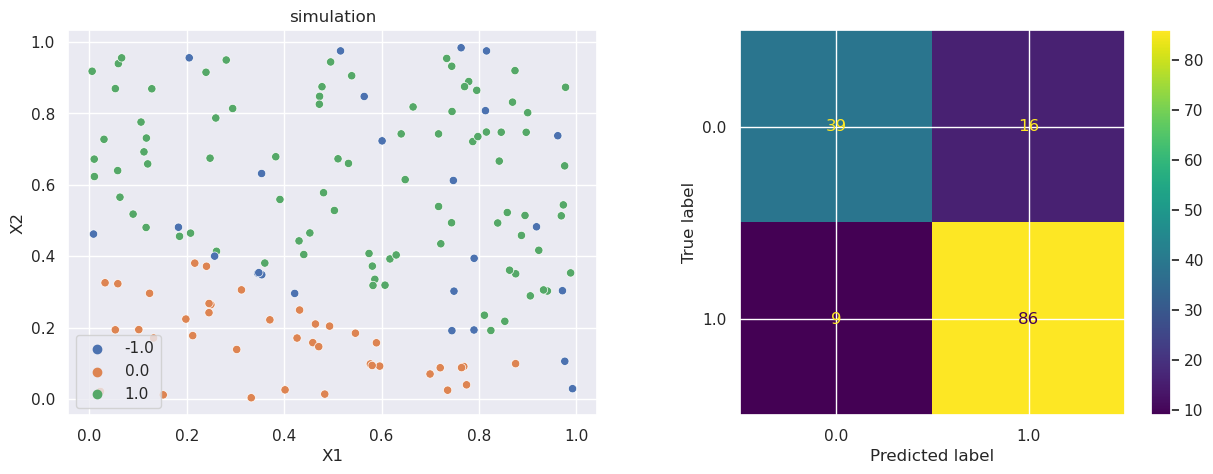

In [11]:
knn20 = KNeighborsClassifier(n_neighbors=20)
evaluate(knn20, X_train, X_test, y_train, y_test, display=True)

# Question 9

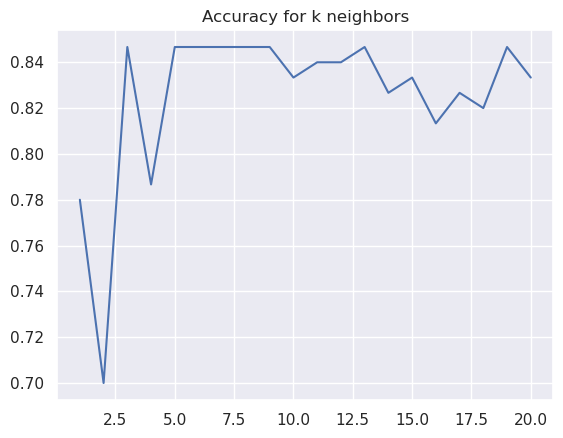

In [12]:
n = range(1, 21)
clfs = [KNeighborsClassifier(n_neighbors=k) for k in n]
## Afficher le graphe de l'évolution de l'accuracy
scores = [evaluate(clf, X_train, X_test, y_train, y_test) for clf in clfs]
res = {n_neighbors:score for n_neighbors, score in zip(n, scores)}
sns.lineplot(x=n, y=scores).set(title="Accuracy for k neighbors");

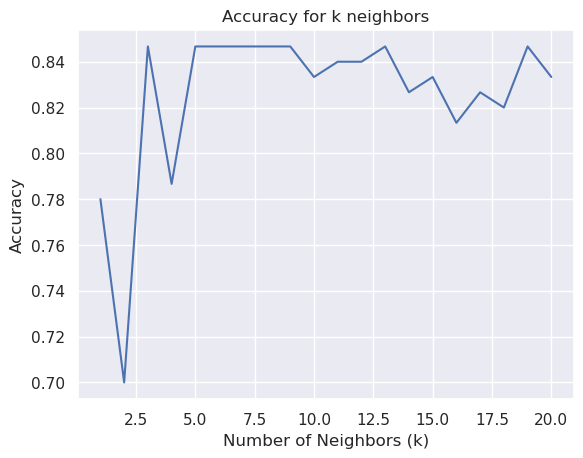

In [13]:
# version chatgpt
n = range(1, 21)

# Créez une liste de classificateurs KNeighborsClassifier avec différents k
clfs = [KNeighborsClassifier(n_neighbors=k) for k in n]

# Créez des listes pour stocker les scores
scores = []

# Bouclez à travers les classificateurs et calculez les scores
for clf in clfs:
    score = evaluate(clf, X_train, X_test, y_train, y_test)
    scores.append(score)

# Créez un dictionnaire pour stocker les résultats
res = {n_neighbors: score for n_neighbors, score in zip(n, scores)}

# Tracez le graphe de l'évolution de l'accuracy
sns.lineplot(x=n, y=scores)
plt.title("Accuracy for k neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()


In [14]:
print("Best estimator:", KNeighborsClassifier(n_neighbors=max(res, key=res.get)))

Best estimator: KNeighborsClassifier(n_neighbors=3)


# Question 11

### LOO

In [15]:
print("Mean score:", np.mean(scores))

Mean score: 0.8253333333333333


### 5-fold

In [16]:
##Utiliser GridSearchcv

print(f"Best parameters: {clf.best_params_} with mean score of {round(clf.best_score_,3)}")

AttributeError: 'KNeighborsClassifier' object has no attribute 'best_params_'

Exercice : tester avec d'autres métriques, voir https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

# Question 12

In [ ]:
final_clf = clf.best_estimator_
final_clf.fit(X_test, y_test)
y_pred = final_clf.predict(X_test)
print("Final accuracy score:", accuracy_score(y_test, y_pred))

In [ ]:
clf.cv_results_

> Le score final est logiquement proche du score moyen de validation car les échantillon d'entrainement et de test ont été généré avec les mêmes lois.